## Introduction



 This notebook details a case study wherein we play the role of a data analyst at Ubisoft with the objective of solving a problem given by executives.

### Tableau Link

https://public.tableau.com/app/profile/titan.russo/viz/Titan_Russo_M1/VideoGameSalesAnalysis?publish=yes

## Case

You are a dedicated data analyst at Ubisoft. Executives have tasked you with figuring out the next long-term project for the studio to work on, emphasizing the North American market and disregarding free to play models. The game should also have a lifespan of more

### SMART

* S: Figure out the genre of game to develop
* M: We aim for 5 million copies sold within 6 years of release
* A: Analyze historical sales data for the top video games. Check for any correlation between genre, platform, and sales
* R: Certain genres may have higher sales numbers than others. There should be valuable insights to be gleaned from the data
* T: Announce development to the public within 2 years

Decide on the genre of game to develop based on historical sales data, aiming to announce development to the public within the next 2 years and to sell 5 milliion copies within 6 years of release

### SWOT

* Strengths: Ubisoft is a globally recognized brand
* Opportunity: Ubisoft has multiple franchises that can be sequelized
* Weakness: Current market price for games is high
* Threats: Competitive market


## Data Loading

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import psycopg2
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels as sm
from scipy.stats import f_oneway, linregress
from PIL import Image
from IPython.display import display

In [2]:
vgTable2024 = pd.read_csv('vgTable2024.csv')

In [3]:
vgTable2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    64016 non-null  int64  
 1   img           64016 non-null  object 
 2   title         64016 non-null  object 
 3   console       64016 non-null  object 
 4   genre         64016 non-null  object 
 5   publisher     64016 non-null  object 
 6   developer     63999 non-null  object 
 7   critic_score  6678 non-null   float64
 8   total_sales   18922 non-null  float64
 9   na_sales      12637 non-null  float64
 10  jp_sales      6726 non-null   float64
 11  pal_sales     12824 non-null  float64
 12  other_sales   15128 non-null  float64
 13  release_date  56965 non-null  object 
 14  last_update   17879 non-null  object 
dtypes: float64(6), int64(1), object(8)
memory usage: 7.3+ MB


### Data Exploration

#### Dataset

The dataset use here details the historical sales numbers of different video game titles. It contains a total of 64016 rows across 14 columns. This dataset was obtained from [Kaggle]https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024/data. Listed below are the column names along with a short description of each:

| Feature                 | Description                                                                                                                                                    |
| ----------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| img             | link to cover art of the game                                                                                                  |                                                                                     |
| title                    | Title of game                                                                                                                                       |
| console          | name of game console                                                      |
| genre                  | genre of game                                                                                                                                        |
| publisher            | name of the game's publisher |
| developer             | name of the game's developer                                                                                                                                     |
| critic_score                | game's critical score                                                                                                                       |
| total_sales                     | sales across all regions in millions                                                                                                  |
| na_sales                   | sales in North America in millions                                                                                                                                     |
| jp_sales                    | sales in Japan  in millions                                                                                          |
| pal_sales                    | sales in PAL region in millions                                                                                                                                   |
| other_sales                 | other sales in millions                                                               |
| release_date                    | date of game's release sold                                                                                                                                             |
| last_update | last update to game                                                                                                                                       |

In [6]:
vgTable2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [294]:
vgTable2024.duplicated().sum()

0

In [421]:
vgTable2024.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [293]:
vgTable2024.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

#### Initial insights

1. Top sellers
    * identify top selling games
    * identify sequels/remakes
    * top recent sellers

2. Genre Performance
    * identify top selling genres
    * identify top selling games by genre
    * identify any correlation between genre and sales

3. Platforms
    * identify top sellers by platform
    * is there any correlation between platform loyalty and sales

4. Release Date Performance
    * identify correlation between release date and sales
        
5. Critic Importance
    * identify correlation between critic score and sales

## Data Cleaning

* We will drop all sales columns aside from `na_sales` as they are irrelevant to the objective of this analysis
* `img` and `developer` will be dropped for the same reasons
* rows with values of 1 million or less in `na_sales` will be dropped as they are not relevant to our goals
* `release_date` and `last_update` need to be datetime
*  extract year and month from release date
* consoles will be grouped by brand to make analyisis more straightforward. Certain consoles will be ommitted from analysis as they are now defunct

In [430]:
# storing dataset for cleaning
vgTable2024_clean = vgTable2024

In [431]:
# dropping unused columns
vgTable2024_clean = vgTable2024_clean.drop(columns=['total_sales', 'pal_sales', 'jp_sales', 'other_sales', 'developer', 'img', 'publisher'])

#Extracting Year and month from release_date
vgTable2024_clean['release_date'] = pd.to_datetime(vgTable2024_clean['release_date'])
vgTable2024_clean.insert(7, 'Release_Year', pd.to_datetime(vgTable2024_clean['release_date']).dt.year)
vgTable2024_clean.insert(8, 'Release_Month', pd.to_datetime(vgTable2024_clean['release_date']).dt.month)

# Clearing null values from na_sales
vgTable2024_clean['na_sales'] = vgTable2024_clean['na_sales'].replace(0,np.nan)
vgTable2024_clean.dropna(subset=['na_sales'], inplace=True)
vgTable2024_clean.dropna(subset=['Release_Month'], inplace=True)

# Clearing entries with negligible sales
vgTable2024_clean.drop(vgTable2024_clean[vgTable2024_clean['na_sales'] <= 1].index, inplace = True)


# Grouping consoles by brand
vgTable2024_clean['console'] = vgTable2024_clean['console'].replace(['PS2','PS3','PS4','PS','PSP'],'Playstation')
vgTable2024_clean['console'] = vgTable2024_clean['console'].replace(['XB','XOne','X360'], 'Xbox')
vgTable2024_clean['console'] = vgTable2024_clean['console'].replace(['Wii','DS','GBA','N64','SNES','NES'],'Nintendo')

In [ ]:
# Storing data for tableau
vgTable2024_clean.to_csv('tableau_file_update_600.csv', index=False)

In [475]:
vgTable2024_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, 0 to 1387
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          618 non-null    object        
 1   console        618 non-null    object        
 2   genre          618 non-null    object        
 3   critic_score   361 non-null    float64       
 4   na_sales       618 non-null    float64       
 5   release_date   618 non-null    datetime64[ns]
 6   last_update    146 non-null    object        
 7   Release_Year   618 non-null    float64       
 8   Release_Month  618 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 64.4+ KB


In [433]:
vgTable2024_clean

,title,console,genre,critic_score,na_sales,release_date,last_update,Release_Year,Release_Month
0,Grand Theft Auto V,PS3,Action,9.4,6.37,2013-09-17,None,2013.0,9.0
1,Grand Theft Auto V,PS4,Action,9.7,6.06,2014-11-18,2018-01-03,2014.0,11.0
2,Grand Theft Auto: Vice City,PS2,Action,9.6,8.41,2002-10-28,None,2002.0,10.0
3,Grand Theft Auto V,X360,Action,NaN,9.06,2013-09-17,None,2013.0,9.0
4,Call of Duty: Black Ops 3,PS4,Shooter,8.1,6.18,2015-11-06,2018-01-14,2015.0,11.0
...,...,...,...,...,...,...,...,...,...
1310,Jungle Hunt,2600,Platform,NaN,1.03,1983-01-01,None,1983.0,1.0
1330,Madden NFL 2004,XB,Sports,NaN,1.02,2003-08-12,None,2003.0,8.0
1334,NFL 2K1,DC,Sports,9.6,1.02,2000-09-07,None,2000.0,9.0
1346,Joust,2600,Platform,NaN,1.01,1983-01-01,None,1983.0,1.0


In [474]:
vgTable2024_clean['console'].value_counts()

console
Playstation    298
Xbox           171
Nintendo        97
PC              20
2600            18
GEN              7
DC               4
GC               3
Name: count, dtype: int64

## Analysis and Calculations

### Normality test

In [434]:
print(f"Skewness: {vgTable2024_clean['na_sales'].skew()}")
print(f"Kurtosis: {vgTable2024_clean['na_sales'].kurt()}")

Skewness: 3.231610040861919
Kurtosis: 13.173061131228748


Kurtosis and Skew are both very high due to a few extreme perfomers in the top end of the data. these include titles like GTAV and the CoD series so we will not be removing them as outliers

<Axes: >

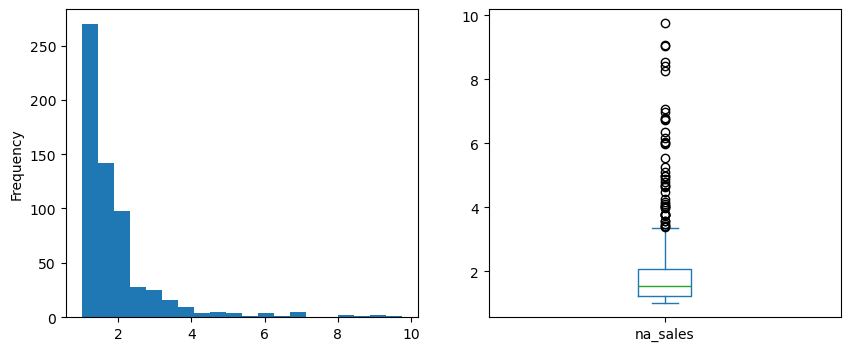

In [435]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

vgTable2024_clean['na_sales'].plot(kind='hist',bins=20,ax=ax[0])
vgTable2024_clean['na_sales'].plot(kind='box',ax=ax[1])

We observe that there are numerous outliers in the data. However, because the data does not account for discount periods, bundles, etc, we consider these outliers to be natural and therefore not handled

## Top Sellers

### Checking top selling games of all time

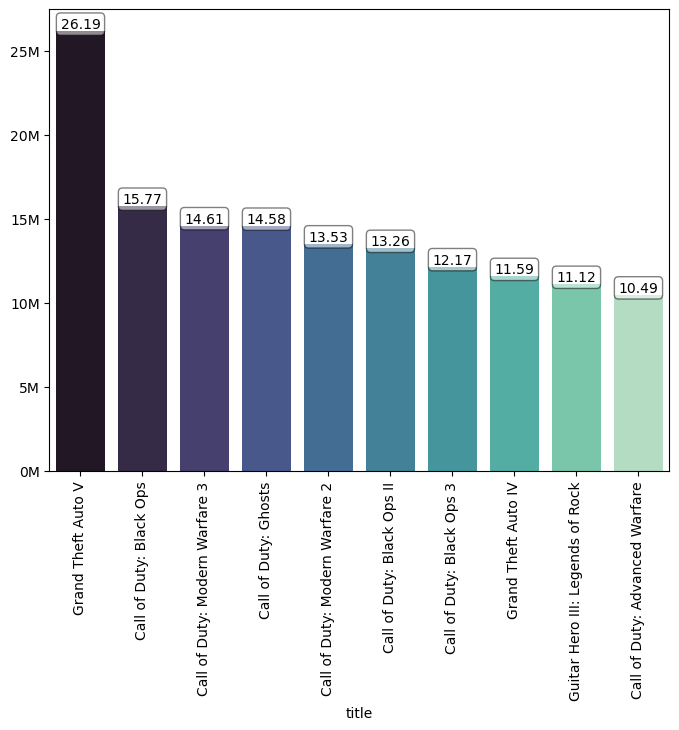

In [441]:
top_sellers=vgTable2024_clean.groupby('title')['na_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
ax=sns.barplot(data=vgTable2024_clean,x=top_sellers.index,y=top_sellers.values,palette='mako')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

#adding 'Millions' to y-axis labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.xticks(rotation=90)
plt.show()

Of the top 10 best selling games of all time, we can see that every title here is a sequel to a long running and well known franchise. It can be inferred that consumers are more willing to spend money on franchises that have a reputation for quality. Or that they are just more willing to spend money based on brand recognition. This initial observation does imply that it would be profitable to develop a sequel to one of our own franchises

### Top selling game within the past 7 years

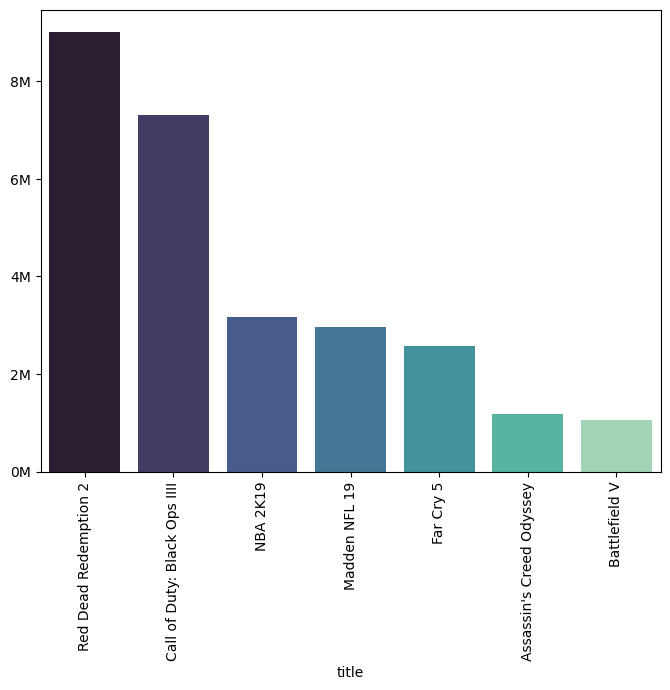

In [366]:
# Filtering games before 2017
top_sellers_5=vgTable2024_clean[vgTable2024_clean['Release_Year'].values>2017].groupby('title')['na_sales'].sum().sort_values(ascending=False).head(10) 
plt.figure(figsize=(8,6))
ax=sns.barplot(data=vgTable2024_clean,x=top_sellers_5.index,y=top_sellers_5.values,palette='mako')

#adding 'Millions' to y-axis labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.xticks(rotation=90)
plt.show()

The previous observation about sequels seems to be backed up based on this plot. We can even see two of our own titles here. This strengthens the idea that we should consider developin a sequel to one of our franchises. Possibly even remake some of our older titles, as suggested by the presence of the Spyro trilogy on this plot

## Genre

#### Top selling Genre

In [426]:
genre_stats=vgTable2024_clean.groupby('genre').agg({
    'critic_score':'median',
    'na_sales':'sum'
}).head(20)
sorted_genres_by_score=genre_stats.sort_values(by='critic_score',ascending=False)
sorted_genres_by_sales=genre_stats.sort_values(by='na_sales',ascending=False)

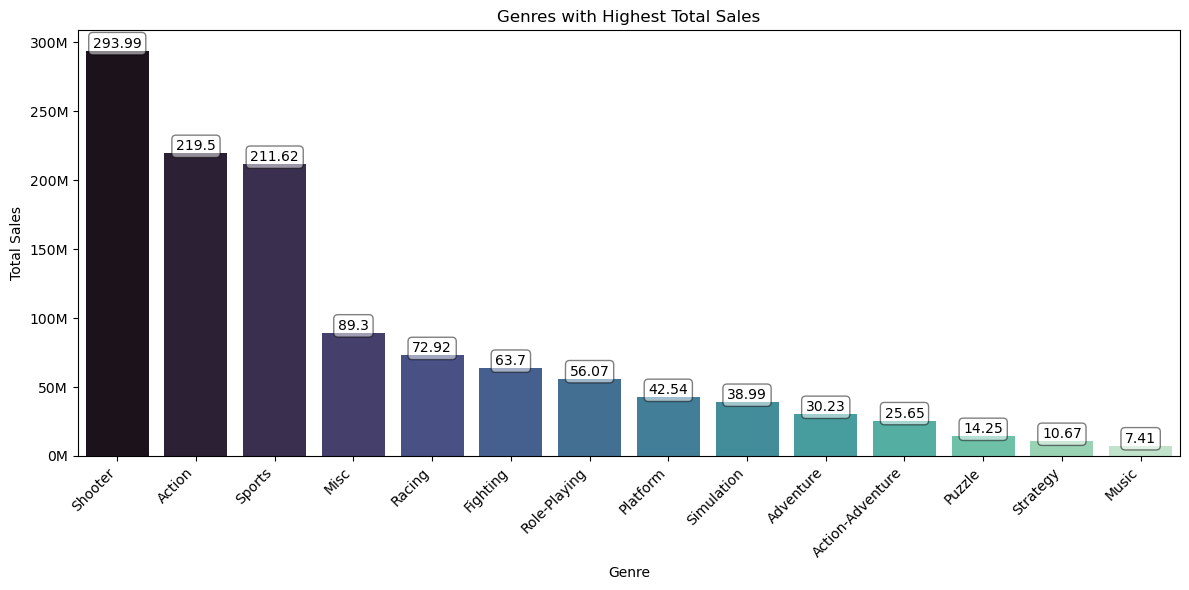

In [482]:
# Plotting top genres by sales
plt.figure(figsize=(12, 6))
ax=sns.barplot(x=sorted_genres_by_sales.index, y=sorted_genres_by_sales['na_sales'], palette='mako')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))
plt.title('Genres with Highest Total Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Variance between sales and genre

We will be using the ANOVA test to check for statistical significance in genre differences. While the data we have is not normally distributed, the ANOVA test is robust to lack of normality due to our large sample size.

We begin the test by setting two hypotheses:

* **H**0 : there is no significant difference in sales between genres
* **H**1 : There is signicant defference in sales between genres

We accept **H**0 if the test returns a p-value > 0.05

In [483]:
# Loop for ANOVA
categorical_attributes = ['genre']
for attr in categorical_attributes:
    groups = [vgTable2024_clean[vgTable2024_clean[attr] == value]['na_sales'] for value in vgTable2024_clean[attr].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA p-value for {attr}: {p_val}")

ANOVA p-value for genre: 1.7780438252999005e-07


p-value is less than 0.05. We therefore conclude there is significant differences in sales depending on genres. The plot above also show that `Sports`, `Action`, and `Shooter` are historically the most popular genres for consumers.

#### Top selling games by genre

In [428]:
genres = vgTable2024_clean.groupby(['title', 'genre'])['na_sales'].sum().sort_values(ascending=False).head(10)

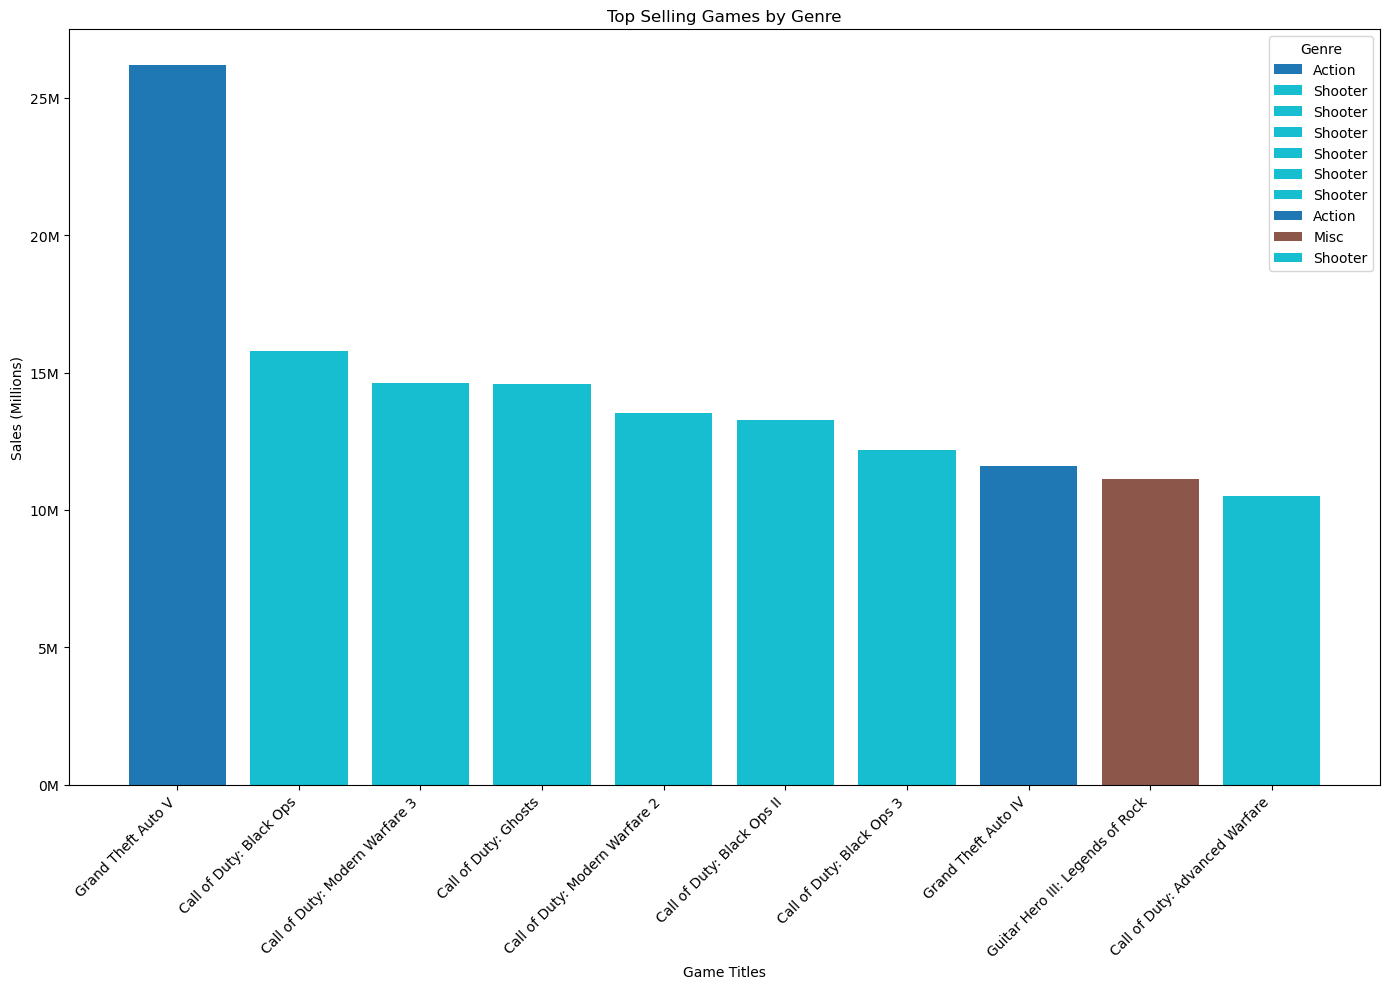

In [429]:
# Plotting top games by genre
titles = [index[0] for index in genres.index]
consoles = [index[1] for index in genres.index]
sales = genres.values
unique_consoles = np.unique(consoles)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_consoles)))
console_colors = dict(zip(unique_consoles, colors))

# Convert sales to millions
sales_in_millions = sales  # dividing by 1 million to get the values in millions
#sales_in_millions = sales / 1e6  # dividing by 1 million to get the values in millions

plt.figure(figsize=(14, 10))
for i in range(len(titles)):
    console = consoles[i]
    color = console_colors[console]
    plt.bar(titles[i], sales_in_millions[i], color=color, label=console)

plt.xlabel('Game Titles')
plt.ylabel('Sales (Millions)')
plt.title('Top Selling Games by Genre')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre',loc='best')

# Add "Millions" to y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.tight_layout()
plt.show()

We see here that most of the top selling games have historically been Shooters.

#### Genre Trends

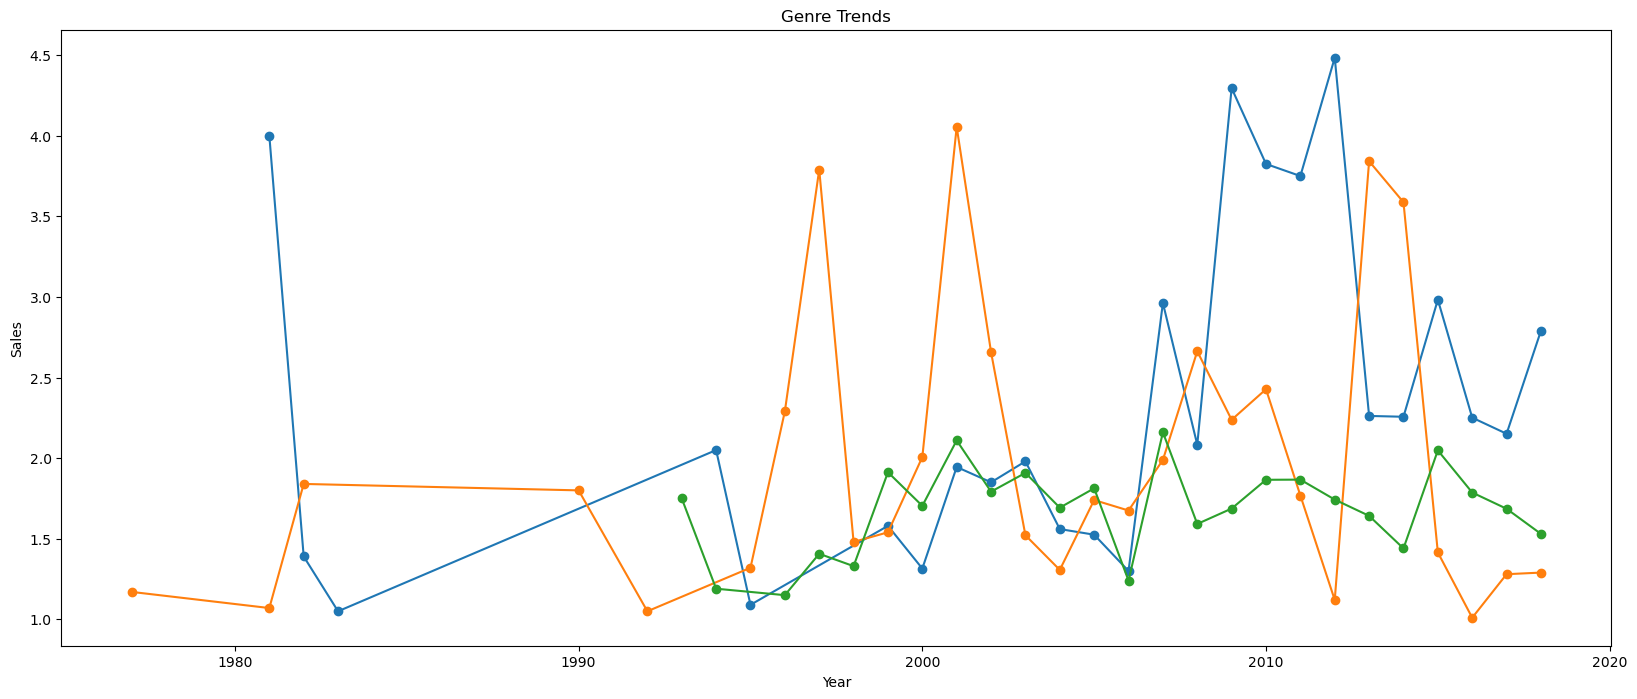

In [555]:
shooter_trends = vgTable2024_clean[vgTable2024_clean.genre == 'Shooter'].groupby(vgTable2024_clean.release_date.dt.year).na_sales.mean()
action_trends = vgTable2024_clean[vgTable2024_clean.genre == 'Action'].groupby(vgTable2024_clean.release_date.dt.year).na_sales.mean()
sports_trends = vgTable2024_clean[vgTable2024_clean.genre == 'Sports'].groupby(vgTable2024_clean.release_date.dt.year).na_sales.mean()

plt.figure(figsize=(20, 8))
#test = np.polyfit
plt.plot(shooter_trends, marker='o')
plt.plot(action_trends, marker='o')
plt.plot(sports_trends, marker='o')
plt.title('Genre Trends')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

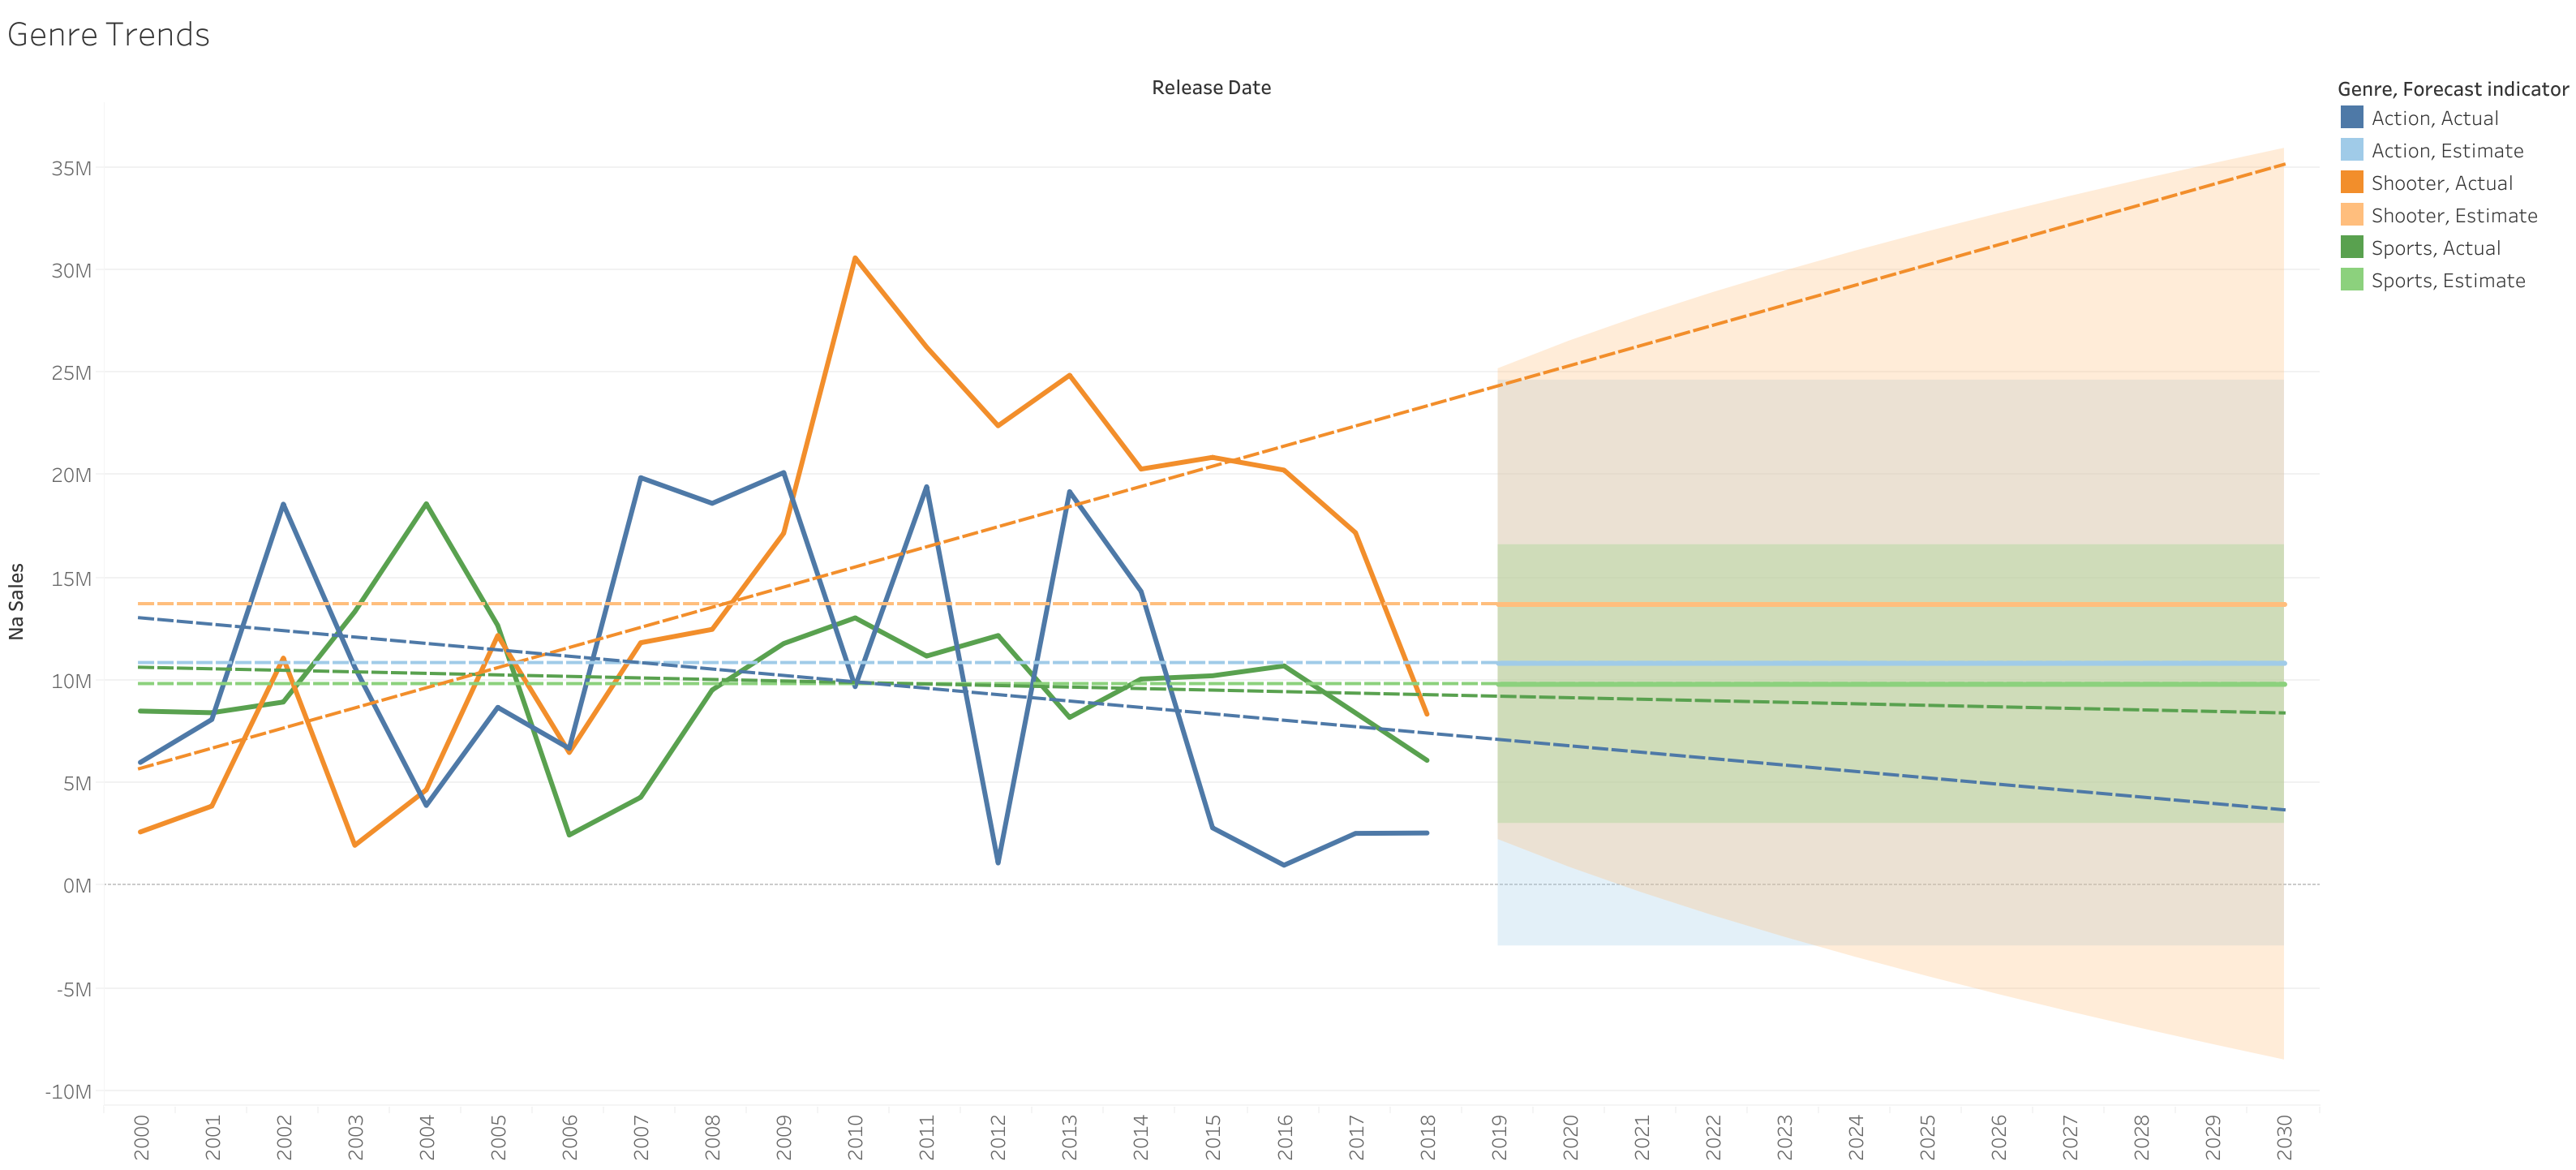

In [562]:
# plot from tableau including forecast and trend lines
trend_img = Image.open('Genre Trends.png')
display(trend_img)

Trend forecasting indicates that the Shooter genre is and will continue to grow in the future. Action and Sports title seem to be trending down.

## Platform

#### Top sellers by platform

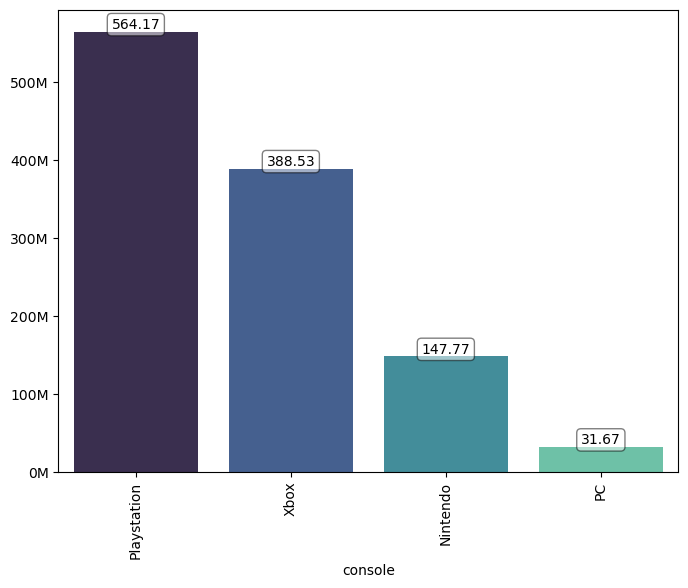

In [529]:
top_sellers=vgTable2024_clean.groupby('console')['na_sales'].sum().sort_values(ascending=False).head(4)
plt.figure(figsize=(8,6))
ax=sns.barplot(data=vgTable2024_clean,x=top_sellers.index,y=top_sellers.values,palette='mako')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

#adding 'Millions' to y-axis labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.xticks(rotation=90)
plt.show()

It can be inferred from this plot that the best platforms for us to release out next project on are Playstation and Xbox. A dual platform release is also possible if production costs allow that move

In [468]:
console_list = vgTable2024_clean.groupby(['title', 'console'])['na_sales'].sum().sort_values(ascending=False).head(20)

#### Platforms of Top Sellers

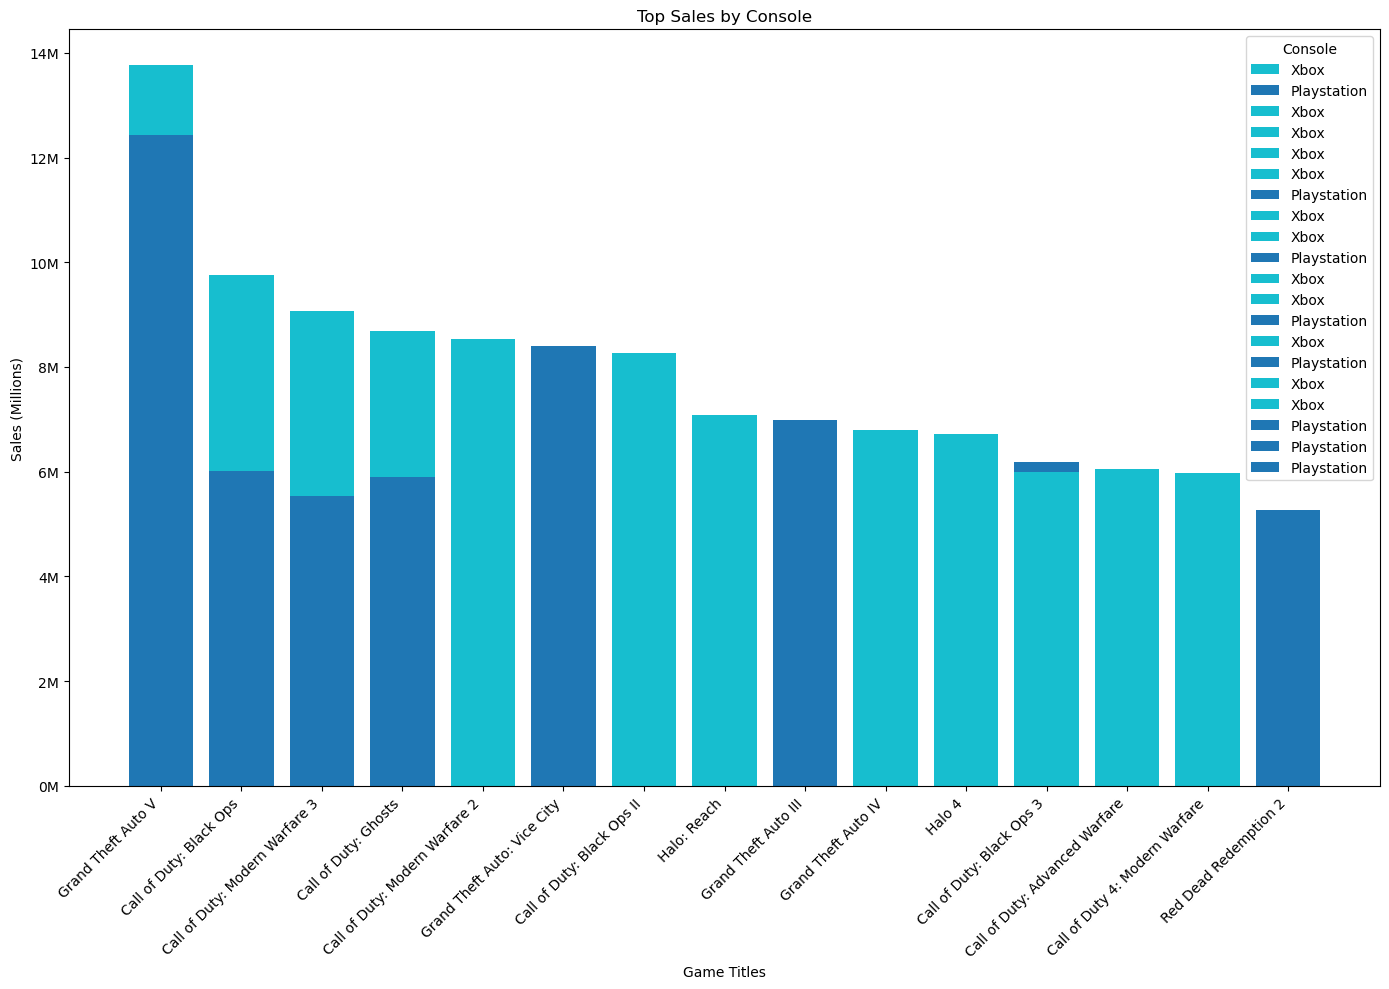

In [528]:
# Plotting top games by console
titles = [index[0] for index in console_list.index]
consoles = [index[1] for index in console_list.index]
sales = console_list.values
unique_consoles = np.unique(consoles)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_consoles)))
console_colors = dict(zip(unique_consoles, colors))

# Convert sales to millions
sales_in_millions = sales  # dividing by 1 million to get the values in millions
#sales_in_millions = sales / 1e6  # dividing by 1 million to get the values in millions

plt.figure(figsize=(14, 10))
for i in range(len(titles)):
    console = consoles[i]
    color = console_colors[console]
    plt.bar(titles[i], sales_in_millions[i], color=color, label=console)

plt.xlabel('Game Titles')
plt.ylabel('Sales (Millions)')
plt.title('Top Sales by Console')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Console',loc='best')

# Add "Millions" to y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.tight_layout()
plt.show()

we can see that the plot is completely dominated by Xbox and Playstation as platforms. Recommend to release the project on those platforms.

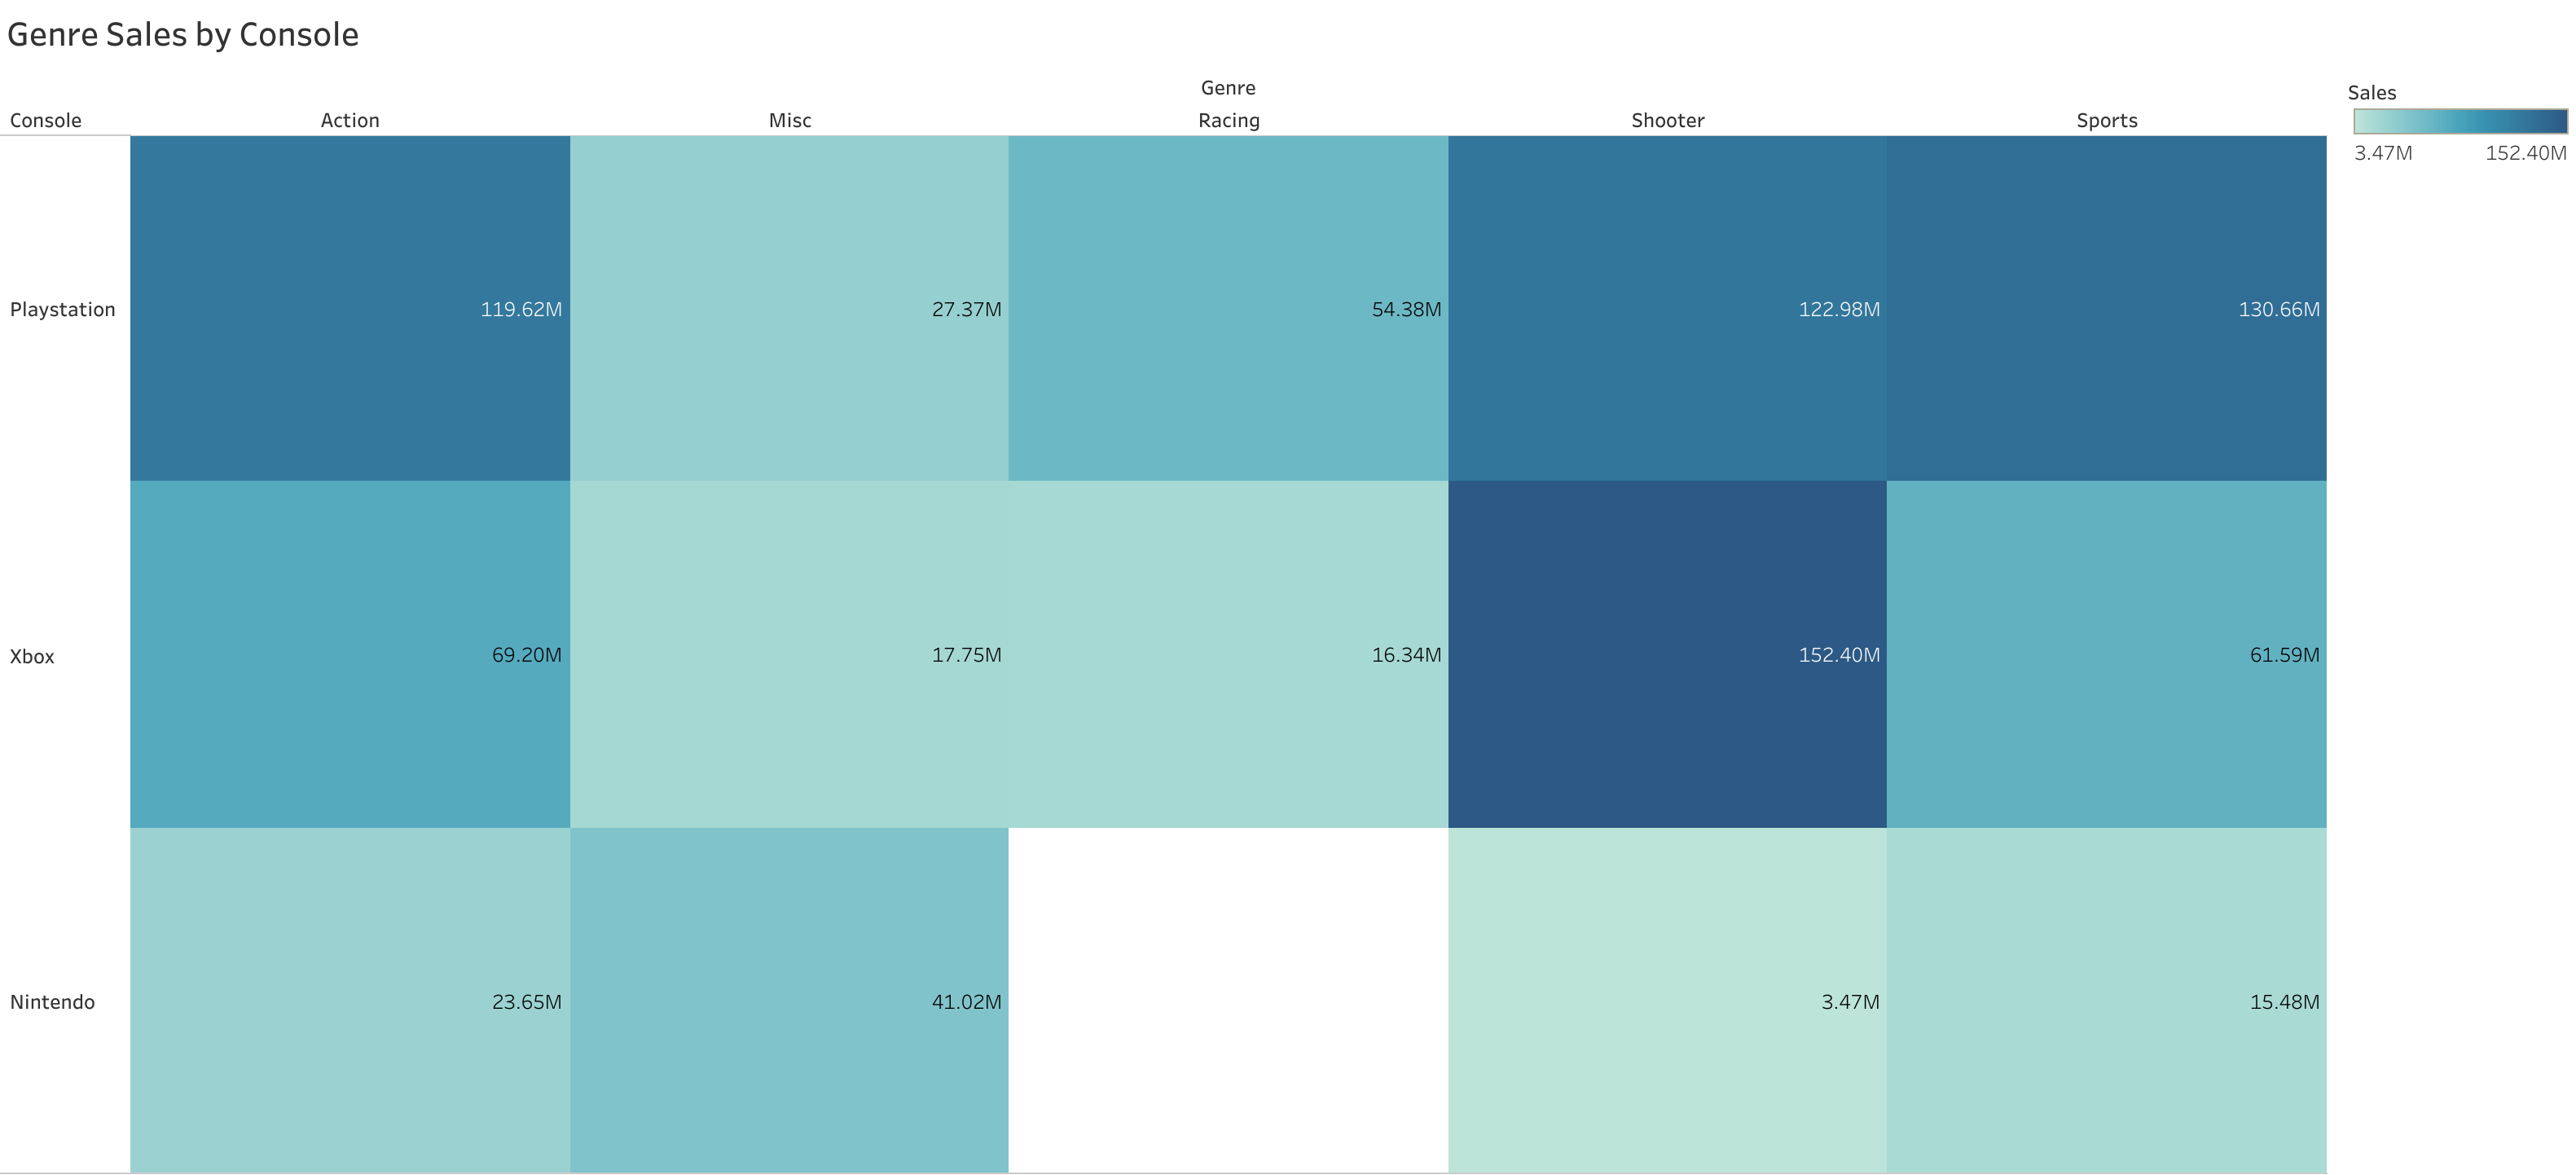

In [3]:
# Heatmap for genre sales by console
heatmap_console_genre = Image.open('Genre Sales by Console.png')
display(heatmap_console_genre)

The above heatmap indicates that the majority of games sales are on Xbox and Playstation.

### ANOVA test for Console and Sales

We begin the test by setting two hypotheses:

* **H**0 : there is no significant difference in sales depending on platform
* **H**1 : There is signicant defference in sales depending on platform

We accept **H**0 if the test returns a p-value > 0.05

In [462]:
categorical_attributes = ['console']
for attr in categorical_attributes:
    groups = [vgTable2024_clean[vgTable2024_clean[attr] == value]['na_sales'] for value in vgTable2024_clean[attr].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA p-value for {attr}: {p_val}")

ANOVA p-value for console: 0.0004209135973957402


p-value from the test is far below 0.05. We can reasonably infer that what platform we decide to release our next project on will have substantial impact on its sales.

## Release Date

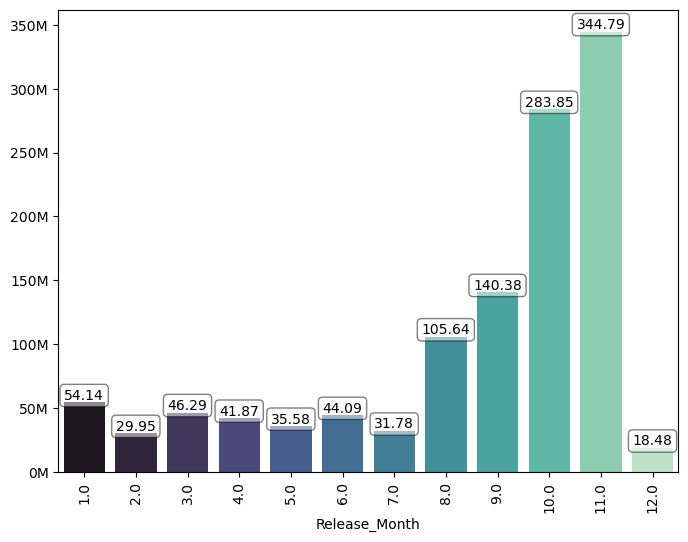

In [565]:
top_sellers=vgTable2024_clean.groupby('Release_Month')['na_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
ax=sns.barplot(data=vgTable2024_clean,x=top_sellers.index,y=top_sellers.values,palette='mako')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

#adding 'Millions' to y-axis labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.xticks(rotation=90)
plt.show()

We see from the above plot that games released around the christmas period seem to do better historically. Highly recommended to follow this pattern.

## Critic Scores

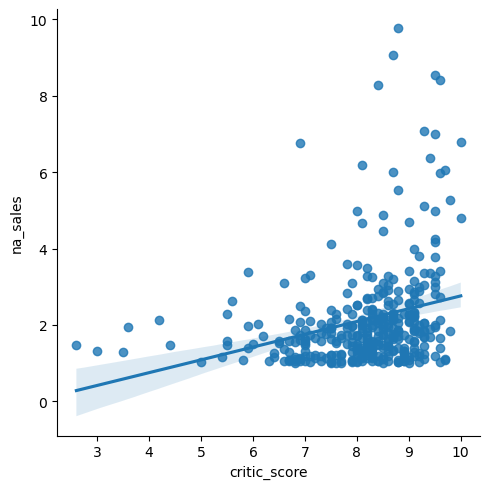

In [477]:
sns.lmplot(data=vgTable2024_clean,x='critic_score', y='na_sales')

Critic Scores seem to have a linear relationship with sales. Meaning that as one value increases, the other follows suiit. We recommend that the project aim for a score

## Conclusion

### Insights

Of all genres, Shooters, Action, and Adventure stand out as high performers. Sequels also dominate the charts. Consumers also seem to prefer buying games on either Xbox or Playstation consoles. The christmas period is optimal for release.

### Recommendation

Based on our findings, the company's next project should have the following factors:

* Genre is recommended to be either 
  * Shooter
  * Action
  * Sport
  in descending order of priority
* Continuations of franchises are favored by consumers
* Game Should be deployed on both Xbox and Playstation to maximize sales
* Released during the christmas period
* Aim for a critic score in the nines


Final reccomendation would be to develop a sequel to one of the companies Action, Shooter, or Sports franchises. Examples include, in no particular order:
 *  Assassin's Creed
 *  Rainbow 6
 *  Far Cry
 *  Prince of Persia 
